## 회귀
* 소득이 증가하면 소비도 증가. 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음.
* 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression이라고 함. 지도학습
* 변수 X와 Y에 대한 정보를 가지고 일차 방정식의 계수 a, b를 찾는 과정이 단순회귀분석 알고리즘

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
# !pip install xlrd
!pip install openpyxl

In [6]:
%pwd

'C:\\workspace\\da_kepco_04_05'

In [11]:
df = pd.read_excel("dataset1/auto-mpg.xlsx",engine='openpyxl')
ndf=df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [12]:
ndf.horsepower.unique() # ?
# ndf.info()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [13]:
import warnings
warnings.filterwarnings('ignore')
ndf.horsepower.replace('?',np.nan,inplace=True)
ndf.dropna(subset=['horsepower'],axis=0,inplace=True)
ndf['horsepower'] = ndf['horsepower'].astype('float')
ndf.to_pickle('./dataset1/auto-mpg.pkl')
ndf = pd.read_pickle('./dataset1/auto-mpg.pkl')
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [10]:
ndf.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

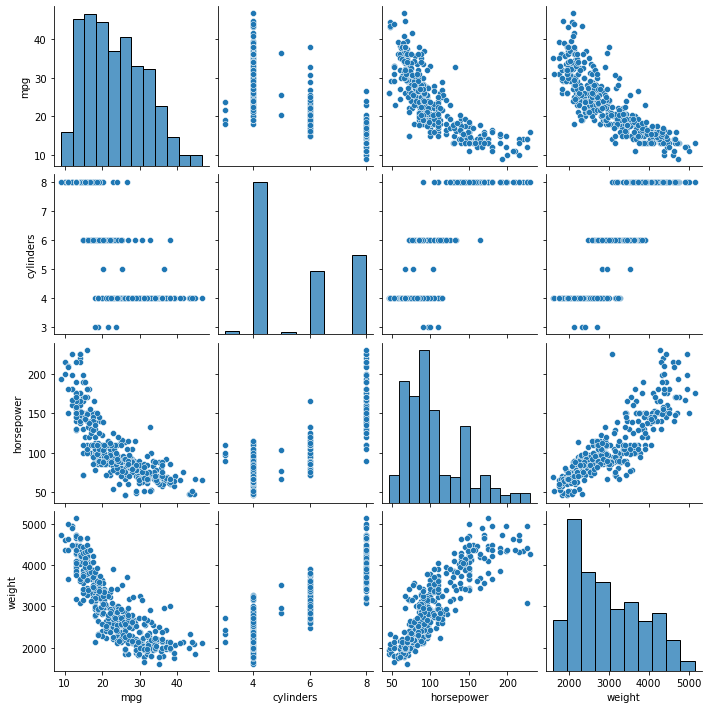

In [11]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)  
plt.show()
plt.close()

In [14]:
# 속성(변수) 선택
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']       #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=11) #랜덤 추출 값 

print('train data 개수: ', len(X_train))
print()
print('test data 개수: ', len(X_test))

train data 개수:  274

test data 개수:  118


In [15]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

### 회귀 평가 지표
* MAE: 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
* MSE: 실제값과 예측값의 차이를 제곱해 평균한 것
* RMSE: MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것 보정)
* R square: 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 함.

In [16]:
# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
# 결정계수 값이 클수록 모형의 예측 성능이 좋다고 판단
# 평가(예측자료와 실자료간의 비교, MSE 값이 낮을수록 좋은 회귀 모델)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
print('MSE: {0:.3f}, RMSE: {0:.3f}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 22.169, RMSE: 22.169
Variance score: 0.641


In [17]:
# 회귀식의 기울기
print('기울기 a: ', lr.coef_)
print()

# 회귀식의 y절편
print('y절편 b:', lr.intercept_)
print()

# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X)

기울기 a:  [-0.00762163]

y절편 b: 45.971217704757684



In [31]:
# 예측값 vs 실제값 
print(list(y_hat[:5].round(1)))
print(list(y_test[:5]))
                    

[19.3, 17.8, 19.8, 19.8, 19.7]
[21.5, 29.0, 23.9, 35.1, 17.5]


pandas.core.series.Series

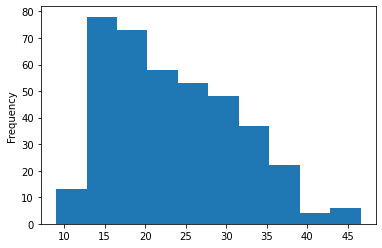

In [16]:
y.plot(kind='hist')
y_hat=pd.Series(y_hat)
type(y_hat)

<AxesSubplot:ylabel='Frequency'>

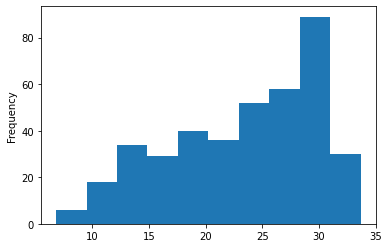

In [17]:
y_hat.plot(kind='hist')

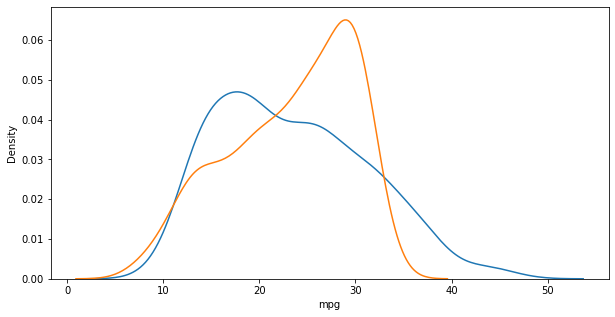

In [18]:
# 실제 값은 왼쪽으로 편향되어 있고 예측값은 반대로 오른쪽으로 편중되는 경향을 보임. 
# 모형의 오차를 줄일 필요있어 보임
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")
# ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
ax2 = sns.distplot(y_hat, hist=False, label="y_hat")
plt.show()
plt.close()

## 다항 회귀분석
* 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
* 2차 함수 이상의 다항 함수를 이용하여 두 변수 간의 선형관계를 설명하는 알고리즘
* 다항 회귀도 선형회귀임. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관

In [19]:
df = pd.read_pickle('dataset1/auto-mpg.pkl')
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [20]:
# ndf 데이터를 train data 와 test data로 구분(7:3 비율)
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape) 
print('훈련 데이터: ', y_train.shape)
print('검증 데이터: ', y_test.shape) 
X_train

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)
훈련 데이터:  (274,)
검증 데이터:  (118,)


,weight
38,4209
172,2223
277,3410
196,2164
357,2615
...,...
375,1980
322,2110
15,2833
127,2901


In [24]:
# 다항회귀분석 모형 - sklearn 사용

# sklearn 라이브러리에서 필요한 모듈 가져오기 
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# 다항식 변환 
poly = PolynomialFeatures(degree=2)               #2차항 적용
X_train_poly=poly.fit_transform(X_train)     #X_train 데이터를 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape) 
X_train_poly[:5]

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


array([[1.0000000e+00, 4.2090000e+03, 1.7715681e+07],
       [1.0000000e+00, 2.2230000e+03, 4.9417290e+06],
       [1.0000000e+00, 3.4100000e+03, 1.1628100e+07],
       [1.0000000e+00, 2.1640000e+03, 4.6828960e+06],
       [1.0000000e+00, 2.6150000e+03, 6.8382250e+06]])

In [32]:
# train data를 가지고 모형 학습
pr = LinearRegression()   
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
# 설계한 모형의 오차가 작다면 R-square가 커지고, 설계한 모형의 오차가 크다면 R-square가 작아짐

X_test_poly = poly.fit_transform(X_test)       #X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly,y_test)
print(r_square)

0.7087009262975685


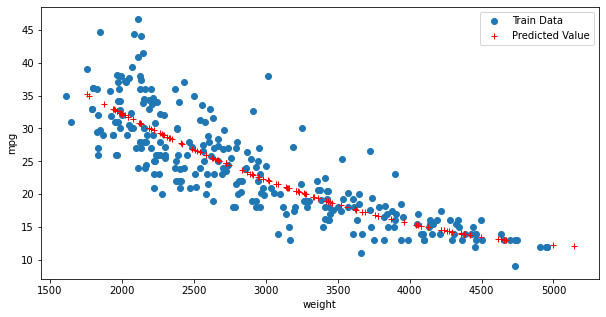

In [33]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

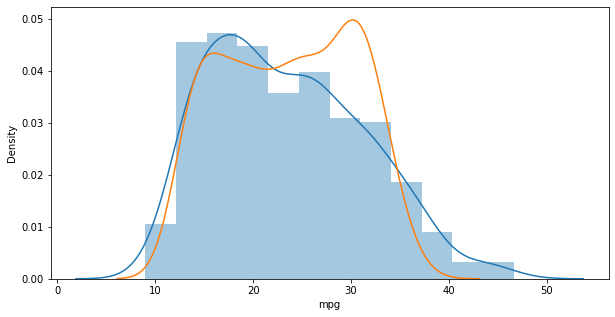

In [34]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
# 단순 회귀분석 결과와 비교하면 데이터가 어느 한쪽으로 편향되는 경향이 상당히 감소한 것을 알 수 있으며 더 적합한 모형임
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=True, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

## 다중 회귀분석
* 여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우에 다중회귀분석을 사용
* 다중 회귀분석 알고리즘은 각 독립 변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성. 지도학습

In [35]:
import pandas as pd
df = pd.read_pickle('dataset/auto-mpg.pkl')
df.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [36]:
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# 속성(변수) 선택
X=ndf[['cylinders', 'horsepower', 'weight']]  #독립 변수 X1, X2, X3
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   

훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)


In [37]:
# 다중회귀분석 모형 - sklearn 사용

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)

In [38]:
# sklearn의 linear_model.LinearRegression를 사용해서 모델을 생성하면 .score()라는 메서드를 사용할 수 있는데 
# R²라고 하는 결정계수(coefficient of determination)를 반환
# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)

0.6939048496695597


In [39]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse,rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.330, RMSE: 4.163
Variance score: 0.694


In [40]:
# 회귀식의 기울기
print('X 변수의 계수 a: ', lr.coef_)
print()

# 회귀식의 y절편
print('상수항 b', lr.intercept_)

X 변수의 계수 a:  [-0.60691288 -0.03714088 -0.00522268]

상수항 b 46.41435126963408


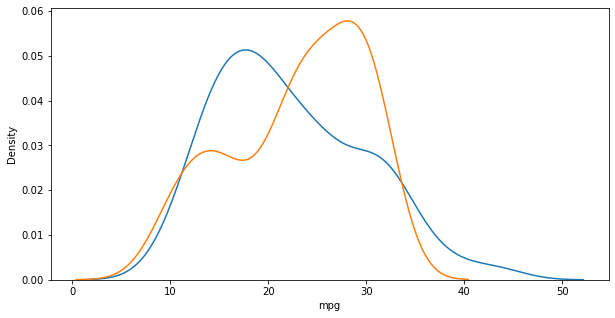

In [41]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
# 단순 회귀분석 결과와 비교시 편향되는 경향은 그대로 남아있지만 그래프의 첨도(뾰족한 정도)가 
# 약간 누그러진 것을 볼 수 있음

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, label="y_test")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat")
# ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

In [42]:
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

ndf_ms = scaler.fit_transform(ndf)
ndf_ms_df = pd.DataFrame(data=ndf_ms, columns=ndf.columns)
ndf_ms_df.head()

,mpg,cylinders,horsepower,weight
0,0.239362,1.0,0.456522,0.536150
1,0.159574,1.0,0.646739,0.589736
2,0.239362,1.0,0.565217,0.516870
3,0.186170,1.0,0.565217,0.516019
4,0.212766,1.0,0.510870,0.520556


In [44]:
# 속성(변수) 선택
X=ndf_ms_df[['cylinders', 'horsepower', 'weight']]  #독립 변수 X1, X2, X3
y=ndf_ms_df['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape) 

# 다중회귀분석 모형 - sklearn 사용

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)

훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)
0.6939048496695599


In [45]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse,rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 0.012, RMSE: 0.111
Variance score: 0.694


<AxesSubplot:title={'center':'mpg Histogram'}, xlabel='mpg', ylabel='Density'>

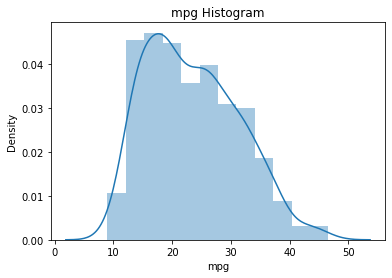

In [46]:
# 회귀 모델을 적용하기 전에 타깃 값의 분포도가 정규 분포인지 확인
plt.title('mpg Histogram')
sns.distplot(ndf['mpg'])

<AxesSubplot:title={'center':'Standard Transformed npg Histogram'}, ylabel='Density'>

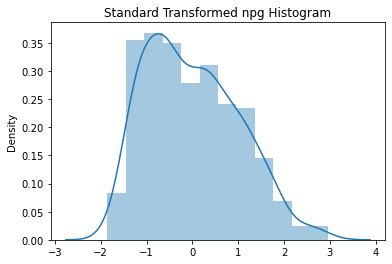

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(ndf[['mpg']])
scaled_data = scaler.transform(ndf[['mpg']])
scaled_data_df = pd.DataFrame(data=scaled_data)

plt.title('Standard Transformed npg Histogram')
sns.distplot(scaled_data_df)

<AxesSubplot:title={'center':'Log Transformed mpg Histogram'}, xlabel='mpg', ylabel='Density'>

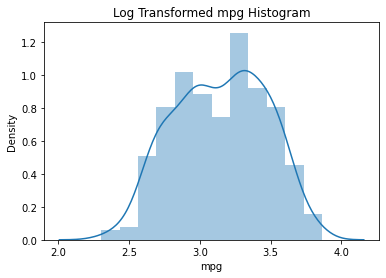

In [48]:
# 결과값을 넘파이의 log1p()를 이용해 로그 변환한 결과값을 기반으로 학습한 뒤 예측시에는 
# 다시 결과값을  expm1()으로 추후 환원
plt.title('Log Transformed mpg Histogram')
log_mpg = np.log1p(ndf['mpg'])
sns.distplot(log_mpg)